In [1]:
import os
import pandas as pd
from eunjeon import Mecab
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [2]:
tagger = Mecab()

In [3]:
path = r'C:\Users\Kislee\PycharmProjects\NLP\판소리춘향'
file_names = [ 
'춘향가&춘향전_20210205.xlsx',
'춘향전or춘향가.xlsx',
'춘향가_20210208.xlsx',
'춘향전_20210210.xlsx',
'학위논문_춘향가&춘향전_20210210.xlsx',
'학위논문_춘향가_20210210.xlsx',
'학위논문_춘향전_20210210.xlsx',
'학위논문_춘향가or춘향전.xlsx'
]


In [4]:
#파일 번호 0~7 선택
file_number = 3

file_name = file_names[file_number]
inputfile = os.path.join(path, file_name)
source_df = pd.read_excel(inputfile, engine="openpyxl")

In [5]:
df = source_df.loc[:, ['저자', '년도', '제목', '초록']]
print("문서 수 : %d" % len(df))

문서 수 : 894


In [6]:
attribute = '제목'

In [7]:
df[attribute] = df[attribute].str.replace(pat=r'[^가-힣0-9 ]', repl= r'', regex=True)
df[attribute] = df[attribute].str.replace(pat=r' +', repl= r' ', regex=True)

In [8]:
df[attribute][:10]

0                  춘향 이야기 겹쳐 읽기 이광수의 일설 춘향전 연구
1    춘향전 패러디 소설과 1955년 영화 춘향전 전후 문화 변동과 전통의 발견
2                                    남북영상중적춘향전
3                       추월가 연구 서사적표현적 특징을 중심으로
4                   문학 속의 사회사 춘향전가공의 현실에 투영된 꿈
5               문학 속의 사회사춘향전이몽룡을 통해 본 조선의 양반관료
6                             문화속의 사회사 춘향전변강쇠전
7                      공사 대립을 통해 본 이행기 한일 대중문학
8           모던 춘향전 계열 춘향전의 특징과 의미방자와 향단이를 중심으로
9                 어사 제수 대목의 변이에 담긴 춘향전 필사층의 의식
Name: 제목, dtype: object

In [9]:
#1. 공백 기반의 n-gram 추출
from nltk import ngrams

#ngram 빈도 카운트
n_gram = {}
n=2
for doc in df[attribute]:
    ngramsres = ngrams(doc.split(), n)
    for grams in ngramsres:
        n_gram[grams] = n_gram.get(grams,0)+1
ngram_freq=[]
for key, value in n_gram.items():
    ngram_freq.append((value, key))
ngram_freq.sort(reverse=True)
print("상위 2단어 조합", ngram_freq[:30])
print()
#ngram 빈도 카운트
n_gram = {}
n=3
for doc in df[attribute]:
    ngramsres = ngrams(doc.split(), n)
    for grams in ngramsres:
        n_gram[grams] = n_gram.get(grams,0)+1
ngram_freq=[]
for key, value in n_gram.items():
    ngram_freq.append((value, key))
ngram_freq.sort(reverse=True)
print("상위 3단어 조합", ngram_freq[:30])
print()
#ngram 빈도 카운트
n_gram = {}
n=4
for doc in df[attribute]:
    ngramsres = ngrams(doc.split(), n)
    for grams in ngramsres:
        n_gram[grams] = n_gram.get(grams,0)+1
ngram_freq=[]
for key, value in n_gram.items():
    ngram_freq.append((value, key))
ngram_freq.sort(reverse=True)
print("상위 4단어 조합", ngram_freq[:30])
print()
#ngram 빈도 카운트
n_gram = {}
n=5
for doc in df[attribute]:
    ngramsres = ngrams(doc.split(), n)
    for grams in ngramsres:
        n_gram[grams] = n_gram.get(grams,0)+1
ngram_freq=[]
for key, value in n_gram.items():
    ngram_freq.append((value, key))
ngram_freq.sort(reverse=True)
print("상위 5단어 조합", ngram_freq[:30])


상위 2단어 조합 [(21, ('춘향전에', '나타난')), (18, ('관한', '연구')), (17, ('춘향전', '연구')), (17, ('그', '의미')), (12, ('춘향전을', '중심으로')), (12, ('양상', '연구')), (12, ('대한', '고찰')), (11, ('통해', '본')), (11, ('양상과', '의미')), (9, ('춘향전', '의')), (8, ('비교', '연구')), (7, ('대한', '연구')), (6, ('춘향예술의', '양식')), (6, ('양식', '분화와')), (6, ('양상과', '그')), (6, ('비교를', '중심으로')), (6, ('분화와', '세계성')), (6, ('본', '춘향전의')), (5, ('춘향전', '비교')), (5, ('본', '춘향전')), (5, ('몇', '가지')), (4, ('판소리계', '소설에')), (4, ('춘향전을', '통해')), (4, ('춘향전에', '대한')), (4, ('춘향전에', '대하여')), (4, ('춘향전', '연구의')), (4, ('중심으로', '한')), (4, ('일제', '말기')), (4, ('월극', '춘향전')), (4, ('열녀춘향수절가를', '중심으로'))]

상위 3단어 조합 [(6, ('춘향예술의', '양식', '분화와')), (6, ('양식', '분화와', '세계성')), (5, ('양상과', '그', '의미')), (3, ('홍윤표', '소장', '154장본')), (3, ('판소리계', '소설에', '나타난')), (3, ('춘향전을', '통해', '본')), (3, ('자료에', '대한', '고찰')), (3, ('번역양상에', '대한', '고찰')), (3, ('발굴된', '문헌', '자료에')), (3, ('문헌', '자료에', '대한')), (3, ('강원도에서', '발굴된', '문헌')), (2, ('혼사장애', '모티프를', '근저에')), (2, ('형상과', '그', '의미')), (2,

In [10]:
title_tagging = [tagger.pos(x) for x in df[attribute]]

In [11]:
title_tagging[0]

[('춘향', 'NNG'),
 ('이야기', 'NNG'),
 ('겹쳐', 'VV+EC'),
 ('읽', 'VV'),
 ('기', 'ETN'),
 ('이광수', 'NNP'),
 ('의', 'JKG'),
 ('일설', 'NNG'),
 ('춘향전', 'NNG'),
 ('연구', 'NNG')]

In [12]:
def tag_filtering(word, tag):
    
    if tag.startswith('J') or tag.startswith('ETM') or tag.startswith('EC') or tag.startswith('X'):
        return ''
    
    if tag=='MM' or tag=='NP' or tag=='VV+EC' or tag=='VV+ETM' or tag=='NNB' or tag=='VCP+ETM' or tag == 'MAJ': #MAJ : 및
        return ''
    
    #stopword 필터링
    #if word in ['연구','중심','방안','고찰']:
    #    return ''
    
    if len(word) <= 1:
        return ''
    
    return word

In [13]:
#형태소 필터링
title_filtering = [ ' '.join(tag_filtering(word[0],word[1]) for word in title) for title in title_tagging]

In [14]:
tok_titles = [[i for i in doc.split()] for doc in title_filtering]

In [15]:
word = {}
cnt = 0
for doc in tok_titles: #대상 문서셋
    for w in doc:
        cnt += 1
        word[w] = word.get(w, 0)+1


print("총 단어수 : %d" % cnt)
print("고유 단어수 : %d" % len(word))

word_freq = []
for key, value in word.items():
    word_freq.append((value, key))

word_freq.sort(reverse=True)
print("상위 단어", word_freq[:200])

총 단어수 : 5433
고유 단어수 : 1476
상위 단어 [(557, '춘향전'), (236, '연구'), (111, '중심'), (109, '양상'), (82, '소설'), (66, '춘향'), (64, '문학'), (57, '비교'), (54, '고찰'), (53, '고전'), (50, '조선'), (48, '판소리'), (48, '영화'), (47, '문화'), (46, '한국'), (36, '창극'), (34, '수용'), (31, '번역'), (31, '교육'), (31, '공연'), (29, '의미'), (26, '전통'), (25, '특징'), (25, '장본'), (25, '성격'), (25, '서사'), (23, '세기'), (21, '고소설'), (20, '분석'), (20, '대하'), (19, '북한'), (19, '변모'), (19, '민족'), (18, '사랑'), (18, '방식'), (17, '인물'), (17, '의의'), (17, '여성'), (17, '문제'), (17, '남원'), (16, '춘향가'), (16, '의식'), (16, '구조'), (16, '개작'), (15, '표현'), (15, '주제'), (15, '이본'), (15, '예술'), (15, '방자'), (15, '대중'), (15, '관련'), (15, '과정'), (14, '중국'), (14, '작품'), (14, '일본'), (14, '열녀춘향수절가'), (14, '양식'), (14, '변용'), (14, '근대'), (14, '고사'), (13, '활동'), (13, '형상'), (13, '콘텐츠'), (12, '후기'), (12, '학습'), (12, '초기'), (12, '인식'), (12, '연극'), (12, '세계'), (11, '희곡'), (11, '활용'), (11, '현대'), (11, '특성'), (11, '텍스트'), (11, '제작'), (11, '자료'), (11, '연구회'), (11, '시대'), (11, '변이'), (1

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
filter_flag = 1 #on : 1
wordcloud_text = ""
for doc in tok_titles:
    for word in doc:
        if filter_flag == 1:
            if word not in ['춘향전','춘향가','중심','연구','양상']: #['춘향가','춘향전','연구','중심'] ['춘향가','연구','중심']
                wordcloud_text = wordcloud_text + word + " "
        else:
            wordcloud_text = wordcloud_text + word + " "

In [18]:
fpath = 'C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path=fpath, background_color='white',width=800, height=600).generate(wordcloud_text)

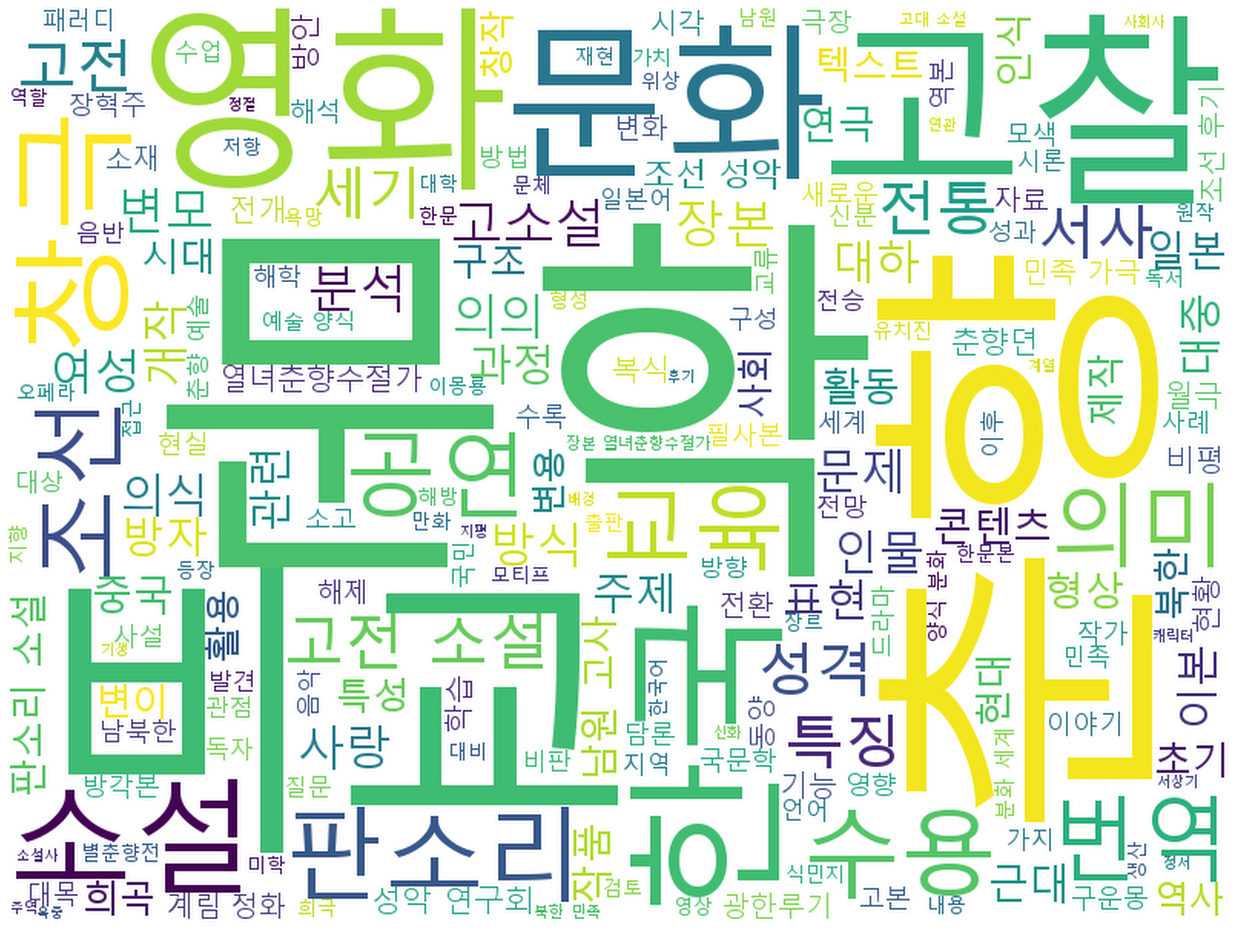

In [19]:
plt.figure(figsize=(22,22)) 
plt.imshow(wordcloud, interpolation='lanczos') 
plt.axis('off') 
plt.show() 

In [20]:
#입력 리스트에 대한 쌍 조합 튜플을 반환
def get_pairs_from_list(lst):
    pairs = []
    unique = list(set(lst)) #리스트 내 중복 제거
    lst_len = len(unique)
    for i in range(lst_len):
        if i==(lst_len-1):
            break
        subset = unique[i+1:]

        for item in subset:
            pairs.append((unique[i], item))
    return pairs

In [21]:
#네트워크 생성, gephi를 위한 source-target 생성
edges = [get_pairs_from_list(doc) for doc in tok_titles]
G = nx.Graph()
for comb in edges:
    for source, dest in comb:
        if G.has_edge(source, dest):
            G[source][dest]['weight'] += 1
        else:
            G.add_edge(source, dest, weight=1)

print("생성된 그래프 노드 수: %d, 엣지 수 : %d" %(G.number_of_nodes(), G.number_of_edges()))

생성된 그래프 노드 수: 1474, 엣지 수 : 13685


In [22]:
#여러번 등장하는 에지를 모두 반영하여 파일로 저장
filename = "for_Gephi_" + file_name[:-5] + '.csv'
save_file_name = os.path.join(path, filename)

with open(save_file_name, mode='w', buffering=-1, encoding="utf-8-sig", newline="") as f:
    writer = csv.writer(f)
    for pairs in edges:
        for pair in pairs:
            writer.writerow(pair)



In [23]:
#####degree 추출 및 소팅
degree = G.degree()
degree_freq = []
for key, value in degree:
    degree_freq.append((value, key))
degree_freq.sort(reverse=True)
print("상위 degree", degree_freq[:100])

상위 degree [(972, '춘향전'), (599, '연구'), (485, '중심'), (362, '양상'), (281, '소설'), (247, '한국'), (238, '문학'), (235, '조선'), (222, '문화'), (204, '춘향'), (194, '고찰'), (184, '판소리'), (183, '비교'), (181, '고전'), (163, '공연'), (154, '영화'), (135, '창극'), (132, '세기'), (128, '번역'), (114, '의의'), (110, '성격'), (110, '고소설'), (105, '특징'), (105, '관련'), (104, '의미'), (103, '양식'), (101, '교육'), (98, '수용'), (98, '서사'), (98, '과정'), (97, '장본'), (95, '새로운'), (95, '극장'), (93, '자료'), (92, '방식'), (92, '발견'), (91, '전통'), (91, '동양'), (89, '일본'), (83, '제작'), (83, '남원'), (82, '무대'), (80, '연구회'), (79, '춘향가'), (78, '활동'), (78, '방자'), (78, '민족'), (77, '변모'), (75, '이후'), (75, '성악'), (75, '대하'), (74, '원형'), (74, '여성'), (73, '현재'), (73, '근대'), (72, '표현'), (72, '분석'), (71, '작품'), (71, '문제'), (71, '고사'), (71, '가능'), (70, '형상'), (70, '텍스트'), (70, '초기'), (70, '사랑'), (70, '대중'), (70, '20'), (70, '1936'), (66, '인물'), (66, '열녀춘향수절가'), (65, '구상'), (64, '근거'), (63, '재구'), (63, '북한'), (63, '극사'), (63, '1934'), (61, '관심'), (61, '84'), (61, '19')

In [24]:
#단어 별 연도 태깅
#년도정보 : df['Year'] 
title_year_tagging = [] # 제목문서 리스트, 각 제목은 단어마다 년도 태그를 가짐

for index in range(len(tok_titles)):
    year_words = []
    for word in tok_titles[index]:
        year_words.append((word,df['년도'][index]))
    title_year_tagging.append(year_words)
    

len(title_year_tagging)
title_year_tagging[0]

[('춘향', 2013),
 ('이야기', 2013),
 ('이광수', 2013),
 ('일설', 2013),
 ('춘향전', 2013),
 ('연구', 2013)]

In [25]:
word_year_freq = {}
#모든 단어 딕셔너리 초기생성
for doc in tok_titles:
    for word in doc:
        word_year_freq[word] = {}

for doc in title_year_tagging:
    for w, y in doc:
        word_year_freq[w][y] = word_year_freq[w].get(y,0)+1 


In [26]:
#5년 단위 문서 수 (df['년도'])
year_counts = [0,0,0,0,0,0,0,0,0,0,0,0,0]

for year in df['년도']:
    if year <= 1960:
        year_counts[0]+=1
    elif 1961 <= year <= 1965 :
        year_counts[1]+=1      
    elif 1966 <= year <= 1970 :
        year_counts[2]+=1      
    elif 1971 <= year <= 1975 :
        year_counts[3]+=1      
    elif 1976 <= year <= 1980 :
        year_counts[4]+=1      
    elif 1981 <= year <= 1985 :
        year_counts[5]+=1      
    elif 1986 <= year <= 1990 :
        year_counts[6]+=1        
    elif 1991 <= year <= 1995 :
        year_counts[7]+=1
    elif 1996 <= year <= 2000 :
        year_counts[8]+=1
    elif 2001 <= year <= 2005 :
        year_counts[9]+=1
    elif 2006 <= year <= 2010 :
        year_counts[10]+=1
    elif 2011 <= year <= 2015 :
        year_counts[11]+=1
    elif 2016 <= year <= 2021 :
        year_counts[12]+=1
print('5년 단위 문헌 수 : ', year_counts)
            
     

5년 단위 문헌 수 :  [23, 11, 8, 22, 26, 26, 33, 56, 83, 114, 147, 188, 157]


In [27]:
#상위 단어별 5년 단위 빈도 출력
for y, w in word_freq[:30]:
    print(w+',', end=' ')
    counts = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    for year, freq in word_year_freq[w].items():
        if year <= 1960:
            counts[0]+=freq
        elif 1961 <= year <= 1965 :
            counts[1]+=freq
        elif 1966 <= year <= 1970 :
            counts[2]+=freq
        elif 1971 <= year <= 1975 :
            counts[3]+=freq
        elif 1976 <= year <= 1980 :
            counts[4]+=freq
        elif 1981 <= year <= 1985 :
            counts[5]+=freq
        elif 1986 <= year <= 1990 :
            counts[6]+=freq
        elif 1991 <= year <= 1995 :
            counts[7]+=freq
        elif 1996 <= year <= 2000 :
            counts[8]+=freq
        elif 2001 <= year <= 2005 :
            counts[9]+=freq
        elif 2006 <= year <= 2010 :
            counts[10]+=freq
        elif 2011 <= year <= 2015 :
            counts[11]+=freq
        elif 2016 <= year <= 2021 :
            counts[12]+=freq

    print(counts)
            
     

춘향전, [21, 9, 7, 13, 18, 18, 25, 39, 60, 67, 86, 101, 93]
연구, [1, 0, 4, 8, 5, 4, 3, 15, 26, 31, 39, 66, 34]
중심, [0, 0, 0, 1, 0, 2, 3, 0, 8, 13, 16, 34, 34]
양상, [0, 0, 0, 0, 0, 0, 3, 4, 10, 16, 14, 35, 27]
소설, [2, 0, 0, 5, 2, 4, 3, 1, 8, 9, 17, 16, 15]
춘향, [0, 1, 0, 0, 2, 1, 1, 1, 4, 17, 8, 14, 17]
문학, [0, 1, 1, 3, 1, 2, 1, 1, 4, 11, 12, 16, 11]
비교, [1, 1, 2, 3, 2, 1, 0, 1, 5, 8, 11, 12, 10]
고찰, [1, 1, 0, 2, 0, 2, 4, 6, 5, 4, 8, 15, 6]
고전, [0, 0, 0, 1, 0, 2, 2, 1, 4, 7, 9, 11, 16]
조선, [1, 0, 0, 0, 0, 0, 0, 0, 1, 4, 8, 25, 11]
판소리, [1, 1, 0, 0, 0, 0, 1, 1, 4, 3, 9, 17, 11]
영화, [0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 14, 12, 14]
문화, [0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 10, 13, 18]
한국, [1, 0, 1, 0, 1, 0, 0, 1, 4, 6, 9, 11, 12]
창극, [0, 0, 0, 1, 0, 0, 1, 1, 3, 8, 7, 11, 4]
수용, [0, 0, 0, 0, 0, 0, 2, 1, 7, 6, 8, 3, 7]
번역, [0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 5, 12, 9]
교육, [0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 8, 9, 9]
공연, [0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 6, 8, 9]
의미, [0, 0, 0, 0, 0, 1, 0, 1, 3, 5, 5, 10, 4]
전통, [0, 0, 0, 0,

In [28]:
#년도별 상위단어 출력
word_by_y = {}
for doc in title_year_tagging: #대상 문서셋
    for w, y in doc:
        if y== 2017 :#and y <= 2019:
            word_by_y[w] = word_by_y.get(w, 0)+1

word_freq_by_y = []
for key, value in word_by_y.items():
    word_freq_by_y.append((value, key))

word_freq_by_y.sort(reverse=True)
print("상위 단어", word_freq_by_y[:30])


상위 단어 [(24, '춘향전'), (11, '연구'), (10, '중심'), (7, '양상'), (5, '조선'), (4, '여성'), (4, '문학'), (4, '고전'), (3, '한국'), (3, '콘텐츠'), (3, '춘향'), (3, '창극'), (3, '영화'), (3, '비교'), (3, '문화'), (3, '공연'), (2, '희극'), (2, '판소리'), (2, '탐색'), (2, '지리'), (2, '좌담'), (2, '장혁주'), (2, '예술'), (2, '연구회'), (2, '연경'), (2, '아관'), (2, '시대'), (2, '수용'), (2, '소설사'), (2, '소설')]
